In [7]:
import numpy as np
import scipy as sci
from scipy.fftpack import fft
from matplotlib.axis import Axis
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import rfft
import sys
import statistics as stat
from scipy.signal import find_peaks
import math
import csv
np.set_printoptions(threshold=sys.maxsize) #Shows all values in array.
CSVDataFarBlue = pd.read_csv("FarBlueDetune.csv")
CSVDataBlue = pd.read_csv("BlueDetune.csv")
CSVDataRed = pd.read_csv("RedDetuning.csv")
CSVDataFarRed = pd.read_csv("FarRedDetune.csv")

FBx1 = CSVDataFarBlue['X1']#FAST IN 3 =0.3V, FILTER = 1.0
FBy1 = CSVDataFarBlue['Y1']
FBx2 = CSVDataFarBlue['X2']#FAST IN 3 =0.3V, FILTER = 1.3
FBy2 = CSVDataFarBlue['Y2']

Bx1 = CSVDataBlue['X1']#FAST IN 3 =0.42V, FILTER = 1.0
By1 = CSVDataBlue['Y1']
Bx2 = CSVDataBlue['X2']#FAST IN 3 =0.42V, FILTER = 1.3
By2 = CSVDataBlue['Y2']
Bx3 = CSVDataBlue['X3']#FAST IN 3 =0.3V, FILTER = 1.0
By3 = CSVDataBlue['Y3']
Bx4 = CSVDataBlue['X4']#FAST IN 3 =0.3V, FILTER = 1.3
By4 = CSVDataBlue['Y4']

Rx1 = CSVDataRed['X1']#FAST IN 3 =0.42V, FILTER = 1.0
Ry1 = CSVDataRed['Y1']
Rx2 = CSVDataRed['X2']#FAST IN 3 =0.42V, FILTER = 1.3
Ry2 = CSVDataRed['Y2']
Rx3 = CSVDataRed['X3']#FAST IN 3 =0.3V, FILTER = 1.0
Ry3 = CSVDataRed['Y3']
Rx4 = CSVDataRed['X4']#FAST IN 3 =0.3V, FILTER = 1.3
Ry4 = CSVDataRed['Y4']

FRx1 = CSVDataFarRed['X1']#FAST IN 3 =0.3V, FILTER = 1.0
FRy1 = CSVDataFarRed['Y1']
FRx2 = CSVDataFarRed['X2']#FAST IN 3 =0.3V, FILTER = 1.3
FRy2 = CSVDataFarRed['Y2']

DATA_CHOICE_X = FRx2 #Input datasets here for automated calculations.
DATA_CHOICE_Y = FRy2
RECORDING_RATE = 1*10**-6 #Input recording rate for uncertainty error prop later. Usually either 1 | 2 micro seconds.
RECORDING_FREQ = 1 / RECORDING_RATE
DETUNING = "Far Red"
FILTER = "1.3"
Fast_In_3 = "0.30"

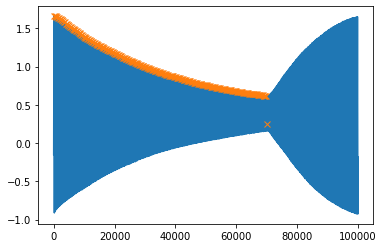

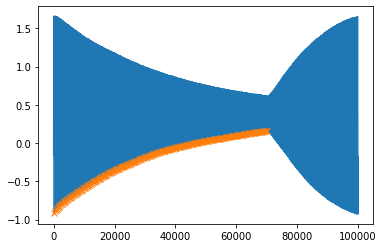

[0.7454687209999996, 0.7674999449999999, 0.788750048, 0.7962499829999998, 0.806406176, 0.8103125329999998, 0.8103124950000001, 0.8096874709999998, 0.8240625759999999, 0.8137500329999998, 0.8209374399999999, 0.8218750359999999, 0.815937569, 0.822187574, 0.813593745, 0.815624929, 0.8192188049999999, 0.823125033, 0.8206249549999999, 0.8157811879999999, 0.8185936429999998, 0.8151562809999999, 0.816562502, 0.817031186, 0.815781255, 0.813906288, 0.821250048, 0.816562486, 0.814687417, 0.813125043, 0.8132811499999999, 0.817499995, 0.8076562929999999, 0.8014062429999999, 0.8084374829999998, 0.8065624619999999, 0.8034374499999999, 0.8049999899999999, 0.80390621, 0.8056250519999999, 0.812968705, 0.8021874640000001, 0.8107812289999998, 0.8070313100000001, 0.810000038, 0.811093714, 0.805625041, 0.8151561539999999, 0.8082811599999999, 0.809062454, 0.812343674, 0.8117186599999999, 0.8115625240000001, 0.8126562019999999, 0.8176561699999999, 0.8146874960000001, 0.814218707, 0.824062404, 0.816562448, 0.

In [8]:
peaks, _ = find_peaks(DATA_CHOICE_Y, height=0.6) #All points above y=0.5
#plt.plot(Ry1)
#plt.plot(peaks, Ry1[peaks], "x")
#plt.plot(np.zeros_like(Ry1), "--", color="gray")
#plt.show()

POS_peaks, _ = find_peaks(DATA_CHOICE_Y[0:70000], distance=150) #Distance = minimum distance between peaks
# difference between peaks is >= 150
#print("Distance between each peak", ":", np.diff(POS_peaks))
# prints Diff between all peaks (will be over 150 as Distace=150)
plt.plot(DATA_CHOICE_Y)
plt.plot(POS_peaks, DATA_CHOICE_Y[POS_peaks], "x")
plt.show()

NEG_peaks, _ = find_peaks(-DATA_CHOICE_Y[0:70000], distance=150) #Distance = minimum distance between peaks
# difference between peaks is >= 150
#print("Distance between each peak", ":", np.diff(NEG_peaks))
# prints Diff between all peaks (will be over 150 as Distace=150)
plt.plot(DATA_CHOICE_Y)
plt.plot(NEG_peaks, DATA_CHOICE_Y[NEG_peaks], "x")
plt.show()

#IF DISTANCE<150, WILL POSSIBLY COUNT OPPOSITE PEAKS TOO.

#CONVERT PANDAS (y1[peakss]) TO FLOAT list- WORKED -> NOW MINUS POS FROM NEG AND WE GET AVERAGE.
#INDEX_POS etc. BELOW IS USELESS, TRY AND DIDNT WORK METHOD.
POS_PEAKS = DATA_CHOICE_Y[POS_peaks].values.tolist()
NEG_PEAKS = DATA_CHOICE_Y[NEG_peaks].values.tolist()
#print(POS_PEAKS)
#print(len(POS_PEAKS))
#print(NEG_PEAKS)
#print(len(NEG_PEAKS))

#PRINTED POS_PEAKS - NEG_PEAKS, average of this value will be offset.
#As POS = 165 points and NEG = 164, last value of NEG is invalid.
PEAKS_DIFF = []
for i in range(len(POS_PEAKS)-1): #0,28616
    PEAKS = POS_PEAKS[i] + NEG_PEAKS[i]
    #print(PEAKS)
    PEAKS_DIFF.append(PEAKS) #placing into array to allow for mathmatical analysis.
print(PEAKS_DIFF)

In [9]:
ADD = sum(PEAKS_DIFF[0:250]) * 1/2 #Adding all values from PEAKS_DIFF, len(POS_PEAKS) values MAX
print(ADD)
OFFSET = ADD/len(PEAKS_DIFF[0:250])
#OFFSET_DIFF = PEAKS_DIFF[1] * 1/2 #Trying out just diff of first POS| NEG peak
print("OFFSET :", OFFSET,"mV")

99.87023169749995
OFFSET : 0.3994809267899998 mV


In [10]:
OFFSET_MEAN = stat.mean(DATA_CHOICE_Y) #Another option for calulcation of OFFSET using not only peaks but all values.
print(OFFSET_MEAN)

0.39274678829456


0       -0.548700
1       -0.526668
2       -0.494793
3       -0.470731
4       -0.452606
5       -0.430106
6       -0.400731
7       -0.386825
8       -0.355731
9       -0.335106
10      -0.303543
11      -0.275887
12      -0.245106
13      -0.212762
14      -0.192918
15      -0.161512
16      -0.128543
17      -0.103231
18      -0.071981
19      -0.039481
20      -0.016512
21       0.016300
22       0.045832
23       0.077550
24       0.106613
25       0.135832
26       0.158957
27       0.188175
28       0.217082
29       0.243488
           ...   
69970   -0.231356
69971   -0.226512
69972   -0.223700
69973   -0.222450
69974   -0.224793
69975   -0.221981
69976   -0.219012
69977   -0.215106
69978   -0.214325
69979   -0.215106
69980   -0.211825
69981   -0.209793
69982   -0.208543
69983   -0.204950
69984   -0.200575
69985   -0.199793
69986   -0.198231
69987   -0.197918
69988   -0.190731
69989   -0.190106
69990   -0.180575
69991   -0.181356
69992   -0.176356
69993   -0.178700
69994   -0

C:\Users\Harry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


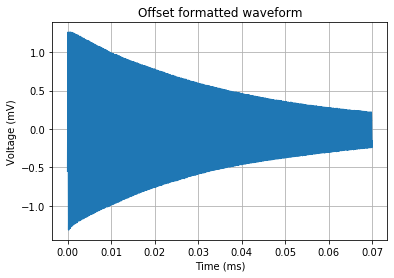

In [11]:
#Creating new lists of data with offset included.
DATA_CHOICE_Y_F = DATA_CHOICE_Y[0:70000] = DATA_CHOICE_Y[0:70000].astype(float) #Setting String Dataframe -> float.
OFFSET_DATA_CHOICE_Y = []
NEW_DATA_Y = DATA_CHOICE_Y_F - OFFSET #Formula for new Y-values with offset included.
for i in DATA_CHOICE_Y_F:
    OFFSET_DATA_CHOICE_Y.append(NEW_DATA_Y)
print(NEW_DATA_Y)

#[0:50] in offset to negate having 1 more of one peak than peak.
#might have a dc "drift", slower change , the offset might not be effectly constant

def plotNEW_DATA(): #Choose to plot a graph of choice.
    plt.plot(DATA_CHOICE_X[0:70000],NEW_DATA_Y[0:70000])
    plt.grid(True)
    plt.title("Offset formatted waveform")
    plt.xlabel("Time (ms)")
    plt.ylabel("Voltage (mV)")
plotNEW_DATA()

In [12]:
def get_pos_indexes(lst):

    index = []

    #Iterate over the list using indexes
    for i in range(len(lst)-1):

        #If first element was positive, add 0 as index
        if i == 0:
            if lst[i] > 0:
                index.append(0)
        #If successive values are negative and positive, i.e indexes switch over, collect the positive index
        if lst[i] < 0 and lst[i+1] > 0:
            index.append(i+1)
        if lst[i] > 0 and lst[i+1] < 0:
            pass

    #If index list was empty, all negative characters were encountered, hence add -1 to index
    if len(index) == 0:
        index = [-1]

    return index

#print(get_pos_indexes(y3)) #ALL SIGN FLIPS WITH NO MINIMAL RQUIREMENT

def X_values():
    for i in get_pos_indexes(NEW_DATA_Y): #Choose Data set to iterate over and obtain X values from.
        print(DATA_CHOICE_X[i]) #VARIABLE CHANGE
#X_values()

l1 = np.array(get_pos_indexes(NEW_DATA_Y)) #ALL VALUE DIFFS AGAINST PREVIOUS DATA POINT : INDEX from GET_POS_INDEXES(MYLIST)

index_X = []
index_l2 = [] #created a list for all l2 values (diff between points) for error analysis, as otherwise before isnt iterable.
for i in range(0,len(l1)-1):
    l2 = l1[i+1]-l1[i]
    if l2>150 and l2<300:
        if l1[i] < 68000: #Limit for index values, as there was a weird jump for no reason 60000->68000. 
            index_X.append(l1[i])#Added All l2 values>150 into list.
            index_l2.append(l2)
            print(l2, ":", l1[i]) #ALL -ve -> +ve X-AXIS CROSSINGS WITH MIN REQUIREMENT OF 60+ from previous value.
        else:
            pass
#print(index_X) #Y - need X, X-INDEX's for placement into time(s).

XTIMES_INDEX = []
def X_valuesTRUE(DATA_CHOICE_X): #Corresponding X-time values to Y-MF values.
    for i in index_X:
        #print(x3[i], ":", y3[i])
        XTIMES_INDEX.append(DATA_CHOICE_X[i]) #VARIABLE CHANGE
X_valuesTRUE(DATA_CHOICE_X)

X_DIFF_TIMES= np.diff(XTIMES_INDEX) #Numpy modules that shows difference between points
#print(X_DIFF_TIMES)

AVERAGE_PERIOD = np.average(X_DIFF_TIMES) 
print("Average Period:", "", AVERAGE_PERIOD,"s")
AVERAGE_FREQ = 1/AVERAGE_PERIOD
print("Average Frequency:", "", AVERAGE_FREQ,"Hz")

280 : 21
279 : 301
280 : 580
280 : 860
280 : 1140
280 : 1420
280 : 1700
280 : 1980
280 : 2260
280 : 2540
280 : 2820
280 : 3100
280 : 3380
280 : 3660
280 : 3940
280 : 4220
281 : 4500
280 : 4781
280 : 5061
280 : 5341
279 : 5621
280 : 5900
281 : 6180
280 : 6461
280 : 6741
280 : 7021
280 : 7301
280 : 7581
280 : 7861
280 : 8141
280 : 8421
280 : 8701
280 : 8981
280 : 9261
281 : 9541
279 : 9822
281 : 10101
280 : 10382
280 : 10662
280 : 10942
280 : 11222
279 : 11502
281 : 11781
280 : 12062
280 : 12342
279 : 12622
281 : 12901
280 : 13182
280 : 13462
280 : 13742
280 : 14022
280 : 14302
280 : 14582
281 : 14862
279 : 15143
280 : 15422
280 : 15702
280 : 15982
281 : 16262
279 : 16543
280 : 16822
281 : 17102
280 : 17383
280 : 17663
280 : 17943
280 : 18223
280 : 18503
280 : 18783
280 : 19063
280 : 19343
280 : 19623
280 : 19903
280 : 20183
280 : 20463
280 : 20743
280 : 21023
280 : 21303
281 : 21583
279 : 21864
280 : 22143
281 : 22423
280 : 22704
280 : 22984
280 : 23264
280 : 23544
280 : 23824
280 : 241

In [13]:
#UNCERTAINTY CALCULATOR. #X_DIFF_TIMES <-> index_l2(?) (apart from first line.)
Error_prop_time = RECORDING_RATE / (math.sqrt(len(X_DIFF_TIMES)))
print("Time error propagation",":",Error_prop_time, "s")
PERCENTAGE_TIME_ERROR = Error_prop_time / AVERAGE_PERIOD
Error_prop_freq = PERCENTAGE_TIME_ERROR * AVERAGE_FREQ
print("Freqeuency error propagation",":",Error_prop_freq, "Hz")

A = [float(i) for i in X_DIFF_TIMES] #changing l2 list from integer to float values to get mean value. <- NOT IN USE ANYMORE
#print(A)
A_mean = stat.mean(A) #mean value of X_DIFF_TIMES (l2(?))
#print("X_DIFF_TIMES_MEAN",":",A_mean)
Deviation_list = []
for i in X_DIFF_TIMES:
    Deviation = i - A_mean
    Deviation_list.append(Deviation) #listed deviations from the mean X_DIFF_TIMES (l2(?)) value.
list_squared_list = []
for i in Deviation_list:
    list_squared = i**2
    list_squared_list.append(list_squared) #listed squared values of Deviations for use (next line) to get varience of X_DIFF_TIMES (l2(?)) data.
VARIENCE = sum(list_squared_list) / (len(list_squared_list)-1) #Varience of X_DIFF_TIMES (l2(?)) -devide by N-1 not N therefore not stat.mean[DONE]
print("Varience",":",VARIENCE)
STANDARD_DEVIATION = math.sqrt(VARIENCE)
print("Standard Deviation",":",STANDARD_DEVIATION)
Time_STANDARD_DEVIATION_ERROR = STANDARD_DEVIATION / math.sqrt(len(X_DIFF_TIMES))
print("Time Standard Deviation Error",":",Time_STANDARD_DEVIATION_ERROR, "seconds")

Time error propagation : 6.468462273531509e-08 s
Freqeuency error propagation : 0.8044685847336471 Hz
Varience : 9.758812230233073e-10
Standard Deviation : 3.123909766659894e-05
Time Standard Deviation Error : 2.0206892471556144e-06 seconds


In [14]:
#CALCULATING MF VALUES FROM AVERAGE PERIOD | APPLYING ERROR TO ALL WAVELENGTH SETTINGS AND LIGHT INTENSITIES
Gyro_ratio = 3.5 #not 2pi * due to the Freq being in Hz therefore no conversion required from radians.
#MF = LARMOR FREQ / GYRO_RATIO
Magnetic_Field = (AVERAGE_FREQ / Gyro_ratio) #* (10**-9) #<-can undo '#' to convert below to Tesla.
#Magnetic_Field_Error = 
print("Magnetic Field",":", Magnetic_Field,"nT")

Magnetic Field : 1007.5949344248153 nT


In [15]:
#WRITING INTO .CSV FILE FOR ANALYSIS. - ENTER THIS AGAIN TO RESET .CSV FILE.
with open('FinalDataPython.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Detuning","Filter","Fast In 3 (V)","FREQ (Hz)", "Error (Hz)", "Magnetic Field (nT)"]) #ROW 1

In [16]:
#APPENDING ITEMS TO LIST. - Have to run whole program again to add next row of new data.
with open('FinalDataPython.csv', 'a', newline='') as file: #'a' = open,write and append to next empty row.
    writer = csv.writer(file)
    writer.writerow([DETUNING,FILTER,Fast_In_3,AVERAGE_FREQ, Error_prop_freq, Magnetic_Field]) #ROW 2->

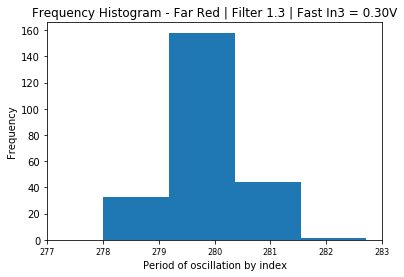

In [17]:
#HISTOGRAM OF ERROR'S TO DETERMINE WHICH ONE FITS BEST. - as the points are mostly 1 value, with a few on either side it wont work, would need better resolution for a gaussian curve.
HistX = X_DIFF_TIMES * 1000000
%matplotlib inline
x = HistX
plt.hist(x, bins=len(HistX))
plt.xlim(277,283)
plt.xticks(fontsize=8)
plt.gca().set(title='Frequency Histogram - Far Red | Filter 1.3 | Fast In3 = 0.30V',xlabel ='Period of oscillation by index',ylabel='Frequency');
plt.savefig("Histogram Far Red Filter 1_3 Fast In0_30")

In [18]:
#------------------------------------------------------------------------------------------------------------------------------#

In [126]:
#From here onwards are checking methods for issues.


#print(len(X_DIFF_TIMES))
#print(X_DIFF_TIMES)

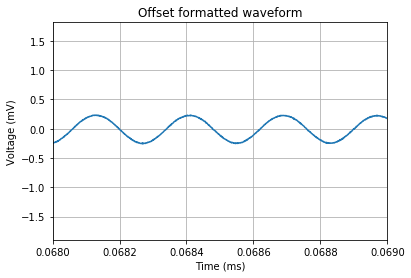

In [11]:
def plotZOOM(): #Checking 680610->68621 issue, nothing abnormal
    plt.plot(DATA_CHOICE_X[0:70000],NEW_DATA_Y[0:70000])
    plt.grid(True)
    plt.title("Offset formatted waveform")
    plt.xlabel("Time (ms)")
    plt.ylabel("Voltage (mV)")
    plt.xlim(0.068,0.069)
plotZOOM()